<a href="https://colab.research.google.com/github/Leito2022/Felicidad_hackaton/blob/main/Felicidad_Hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import folium

folium.Map(location=[40.4637, -3.7492], zoom_start=6, tiles='Stamen Terrain')

In [ ]:

from js import fetch


SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Importamos el data set.
from google.colab import files 
import io
upload = files.upload()

Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv


In [ ]:
#Vinculamos los datasets a una variable
df_2021 = pd.read_csv(io.BytesIO(upload["2021.csv"]))
df_2022 = pd.read_csv(io.BytesIO(upload["2022.csv"]))

In [ ]:
df_2021.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
df_2021.isna().sum()
print('% de registros con al menos un valor nulo:     ', np.round(100 * df_2021.isna().any(axis=1).sum() / df_2021.shape[0], 1))

% de registros con al menos un valor nulo:      0.0


In [ ]:
df_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [ ]:
df_2021.sort_values(["Ladder score"], ascending = False, axis = 0)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [ ]:
paises = list(df_2021["Country name"])
df_2021_top10 = df_2021[["Country name", "Freedom to make life choices"]].head(10)

df_2021_top10

,Country name,Freedom to make life choices
0,Finland,0.949
1,Denmark,0.946
2,Switzerland,0.919
3,Iceland,0.955
4,Netherlands,0.913
5,Norway,0.960
6,Sweden,0.945
7,Luxembourg,0.907
8,New Zealand,0.929
9,Austria,0.908


<function matplotlib.pyplot.show>

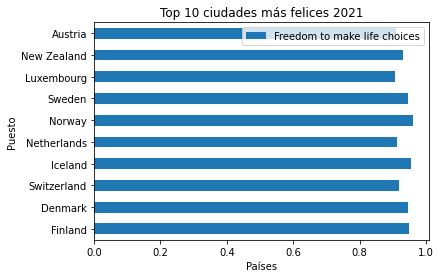

In [ ]:
#Top 10 ciudades más felices 2021

df_2021_top10.plot(kind = "barh", x = "Country name", y = "Freedom to make life choices")

plt.title("Top 10 ciudades más felices 2021")
plt.xlabel("Países")
plt.ylabel("Puesto")
plt.show



In [ ]:
#Vamos a determinar cuantos países pertenecen al decíl más alto, medio y bajo de felicidad

categoria = df_2021[["Country name", "Ladder score"]]

categoria.sort_values("Ladder score", ascending = False)

,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145


In [ ]:
#Observamos las metricas según región.

df_region = df_2021.groupby("Regional indicator", axis = 0).mean()
df_region

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,,,,,,,,,,,
Central and Eastern Europe,5.984765,0.048471,6.079941,5.889529,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529,2.43,1.213588,0.957235,0.625529,0.505353,0.136353,0.056588,2.490000
Commonwealth of Independent States,5.467000,0.046750,5.558417,5.375250,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083,2.43,0.966500,0.923500,0.520583,0.529500,0.164583,0.136667,2.225750
East Asia,5.810333,0.040000,5.889500,5.731667,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333,2.43,1.304000,0.896667,0.717333,0.464667,0.147333,0.163000,2.117833
Latin America and Caribbean,5.908050,0.073900,6.052800,5.763150,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600,2.43,0.955400,0.848900,0.585800,0.547550,0.143700,0.093650,2.733000
Middle East and North Africa,5.219765,0.057000,5.331176,5.108059,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235,2.43,1.058882,0.754588,0.539529,0.407353,0.135765,0.113000,2.210588
North America and ANZ,7.128500,0.043000,7.213000,7.044250,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250,2.43,1.458250,1.061000,0.751250,0.628500,0.266250,0.312750,2.650500
South Asia,4.441857,0.055143,4.549286,4.334143,8.682571,0.703429,62.681000,0.765000,0.042714,0.797429,2.43,0.715286,0.542286,0.447286,0.466429,0.215857,0.090571,1.964000
Southeast Asia,5.407556,0.050000,5.505556,5.309444,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111,2.43,0.973556,0.805667,0.516889,0.641444,0.289889,0.146667,2.033444
Sub-Saharan Africa,4.494472,0.078333,4.648250,4.340889,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944,2.43,0.503111,0.527611,0.233333,0.415500,0.196694,0.110583,2.507722


<function matplotlib.pyplot.show>

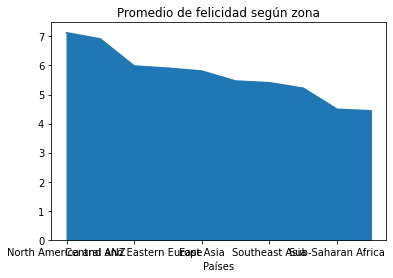

In [ ]:
df_region["Ladder score"].sort_values(ascending = False).plot(kind = "area", stacked = True,x = "Ladder score" )

plt.title("Promedio de felicidad según zona")
plt.xlabel("Países")
plt.ylabel("")
plt.show

In [ ]:
#